<a href="https://colab.research.google.com/github/asafdari-boop/ComputationalPhyiscsLibrary/blob/main/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Data


<h5> Generate some data using a linear function with:
\begin{equation} \theta_0= 4 \end{equation} 
\begin{equation} \theta_1= 3 \end{equation} 

Add some Gaussian noise to the data.

Example code from https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f


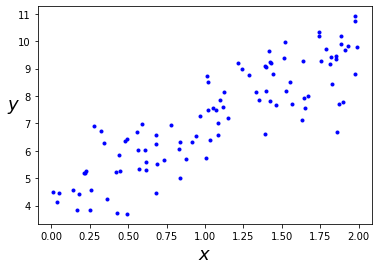

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

# Gradient Descent

To explain in brief about gradient descent, imagine that you are on a mountain and are blindfolded and your task is to come down from the mountain to the flat land without assistance. The only assistance you have is a gadget which tells you the height from sea-level. What would be your approach be. You would start to descend in some random direction and then ask the gadget what is the height now. If the gadget tells you that height and it is more than the initial height then you know you started in wrong direction. You change the direction and repeat the process. This way in many iterations finally you successfully descend down. Here is the analogy with machine learning terms now:

Size of Steps took in any direction = Learning rate

Gadget tells you height = Cost function

The direction of your steps = Gradients

We want to fit $J(\theta) = \theta_0 + \theta_1 X$.

## Cost Function & Gradients

<h4> The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have  to be derived from the cost functions



<b>Cost</b>
\begin{equation}
J(\theta) = m/2 \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

where $m$ is number of observations. 

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
how to go from a current value to a new value:
\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)})
\end{equation}

where $\alpha$ is the learning rate. 

In [ ]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (m/2) * np.sum(np.square(predictions-y))
    return cost


In [ ]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

<h3> Let's start with 400 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution

In [ ]:
lr =0.01
n_iter = 400

theta = np.random.randn(2, 1) # give random initial values

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.831,
Theta1:          3.107
Final cost/MSE:  4467.837


<h3> Let's plot the cost history over iterations

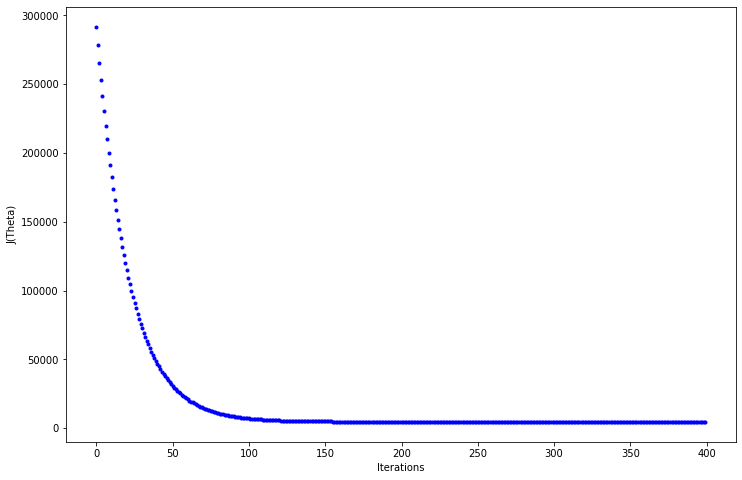

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

# Stochastic Gradient Descent

In our gradient descent algorithm we did the gradients on each observation one by one,in stochastic gradient descent we can chose the random observations randomly. It is called stochastic because samples are selected randomly (or shuffled) instead of as a single group (as in standard gradient descent) or in the order they appear in the training set.

In [ ]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

Theta0:          4.272,
Theta1:          2.772
Final cost/MSE:  40.490


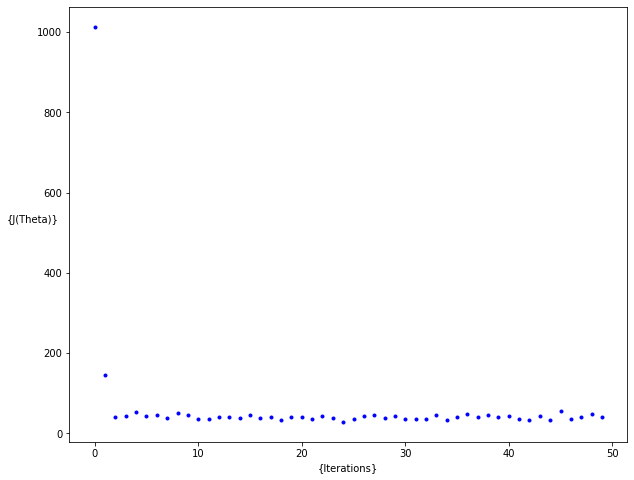

In [ ]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

# Mini Batch Gradient Descent

In actual practice we use an approach called Mini batch gradient descent. This approach uses random samples but in batches. What this means is that we do not calculate the gradients for each observation but for a group of observations which results in a faster optimization.A simple way to implement is to shuffle the observations and then create batches and then proceed with gradient descent using batches.

In [ ]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

Theta0:          4.192,
Theta1:          2.822
Final cost/MSE:  849.131


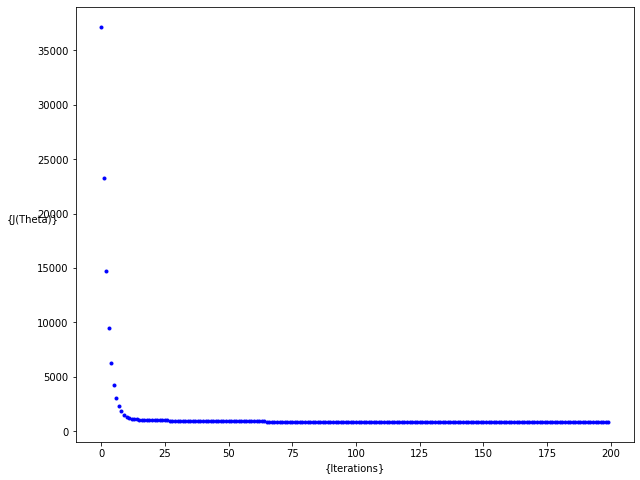

In [ ]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)
theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')